In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Customer Churn.csv")

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 **replacing blacks with 0 as tenure is 0 and no total charges are recorded.**

In [6]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
data["customerID"].duplicated().sum()

np.int64(0)

In [10]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)

**converted 0 and 1 values of senior citizen to yes/no to make it easier to understand.**

### Exploratory Data Analysis (EDA)

C:\Users\sawma\AppData\Local\Temp\ipykernel_5288\3593760405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data["Churn"], palette=colors)


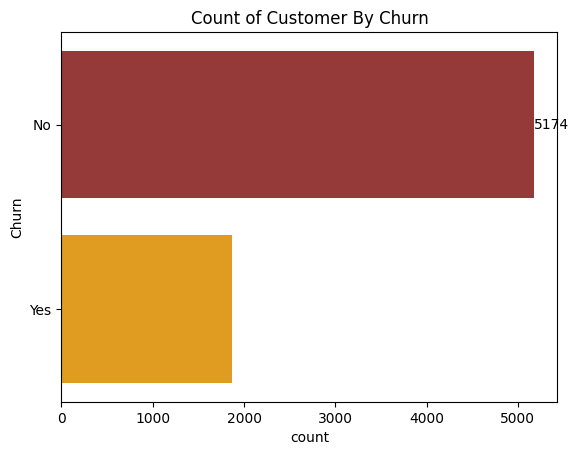

In [11]:
colors = ["brown","orange"]
ax = sns.countplot(data["Churn"], palette=colors)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer By Churn")
plt.show()

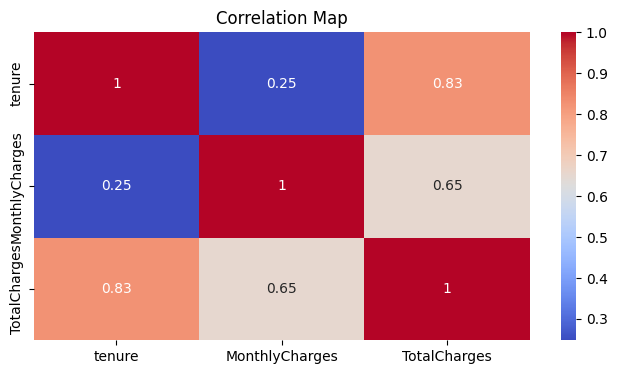

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']]
            .corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Map")
plt.show()

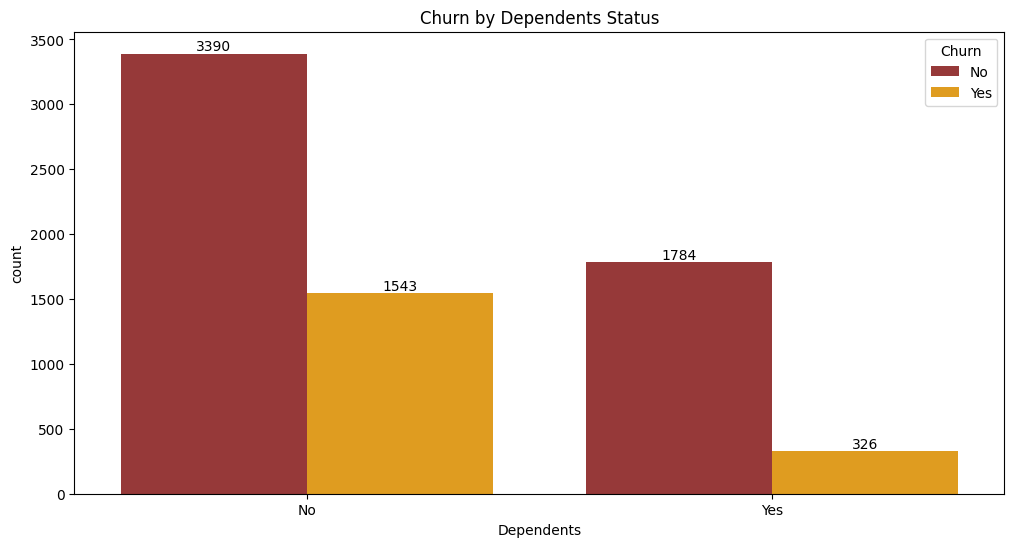

In [13]:
plt.figure(figsize=(12,6))
colors = ["brown", "orange"]
xx = sns.countplot(x='Dependents', hue='Churn', data=data, palette=colors)
xx.bar_label(xx.containers[0])
xx.bar_label(xx.containers[1])
plt.title("Churn by Dependents Status")
plt.show()

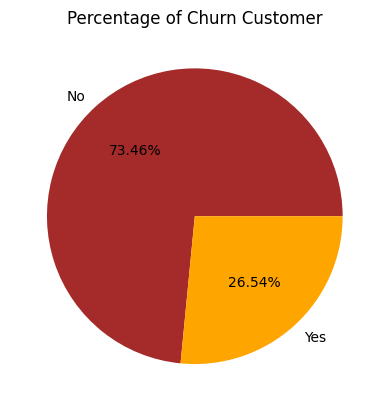

In [14]:
clr = ["brown","orange"]
gb = data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%",colors=clr)
plt.title("Percentage of Churn Customer")
plt.show()

**from the given pie chart we can conclude that 26.54% of our customer have churned out. Not let's explode the reason behind it.**

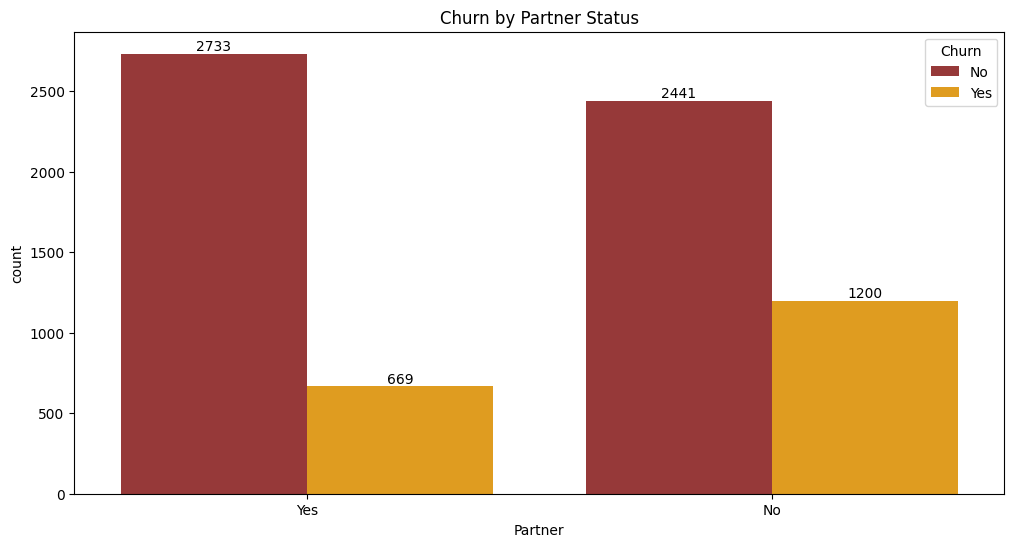

In [15]:
plt.figure(figsize=(12,6))
colors = ["brown", "orange"]
xx = sns.countplot(x='Partner', hue='Churn', data=data, palette=colors)
xx.bar_label(xx.containers[0])
xx.bar_label(xx.containers[1])
plt.title("Churn by Partner Status")
plt.show()

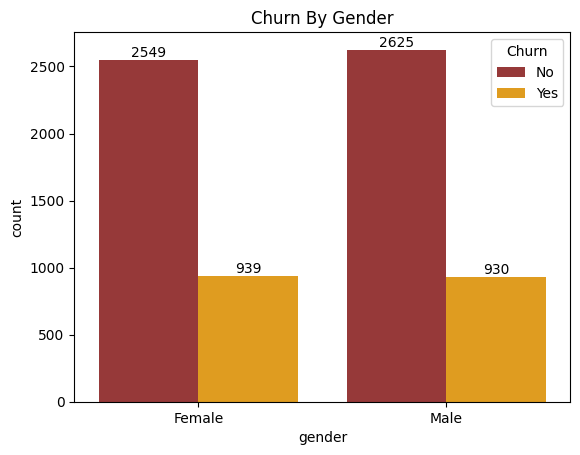

In [16]:
colors = ["brown","orange"]
xx = sns.countplot(x = "gender", data = data, hue="Churn", palette=colors)
xx.bar_label(xx.containers[0])
xx.bar_label(xx.containers[1])
plt.title("Churn By Gender")
plt.show()

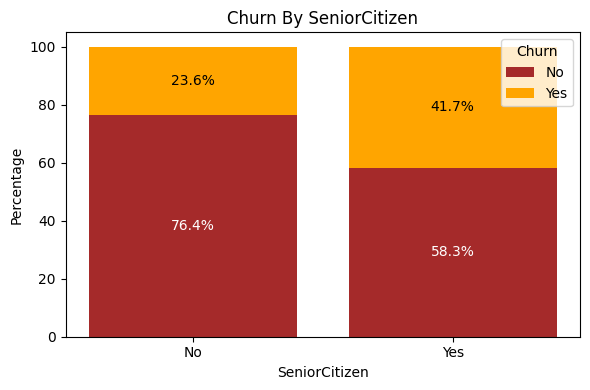

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Count values
counts = data.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# Convert to percentage
percent = counts.div(counts.sum(axis=1), axis=0) * 100

# Colors for each churn type
colors = ["brown", "orange"]

# Plot stacked bars
plt.figure(figsize=(6,4))
plt.bar(percent.index, percent.iloc[:,0], color=colors[0], label=percent.columns[0])
plt.bar(percent.index, percent.iloc[:,1], bottom=percent.iloc[:,0], color=colors[1], label=percent.columns[1])

# Add percentage labels
for i in range(len(percent)):
    h1 = percent.iloc[i,0]
    h2 = percent.iloc[i,1]
    plt.text(i, h1/2, f"{h1:.1f}%", ha="center", va="center", color="white", fontsize=10)
    plt.text(i, h1 + h2/2, f"{h2:.1f}%", ha="center", va="center", fontsize=10)

plt.title("Churn By SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


**comparitive a greater percentage of people in senior citizen category have churned.**

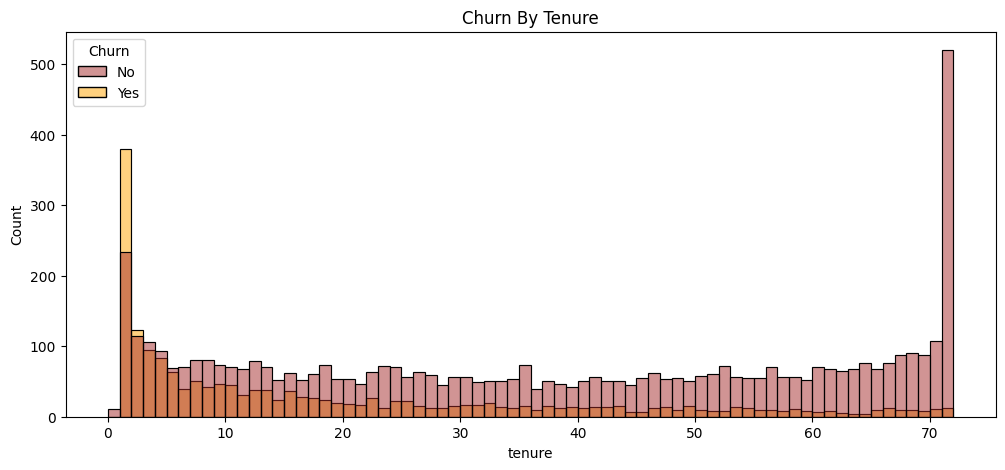

In [18]:
colors = ["brown", "orange"]
plt.figure(figsize = (12,5))
sns.histplot(x = "tenure", data = data, bins = 72, hue = "Churn", palette = colors)
plt.title("Churn By Tenure")
plt.show()

**people who have used our services for long time have stayed and people who have used for service for 1 or 2 months have Churned.**

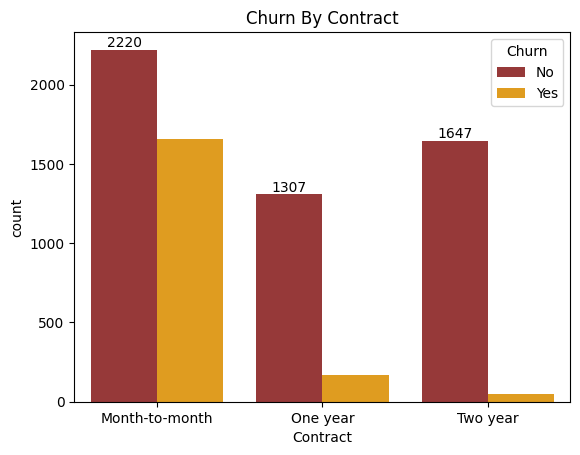

In [19]:
colors = ["brown","orange"]
xx = sns.countplot(x = "Contract", data = data, hue="Churn", palette=colors)
xx.bar_label(xx.containers[0])
plt.title("Churn By Contract")
plt.show()

**people who have month to month contract likely to churn then from those who have 1 or 2 years of contract.**

In [20]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

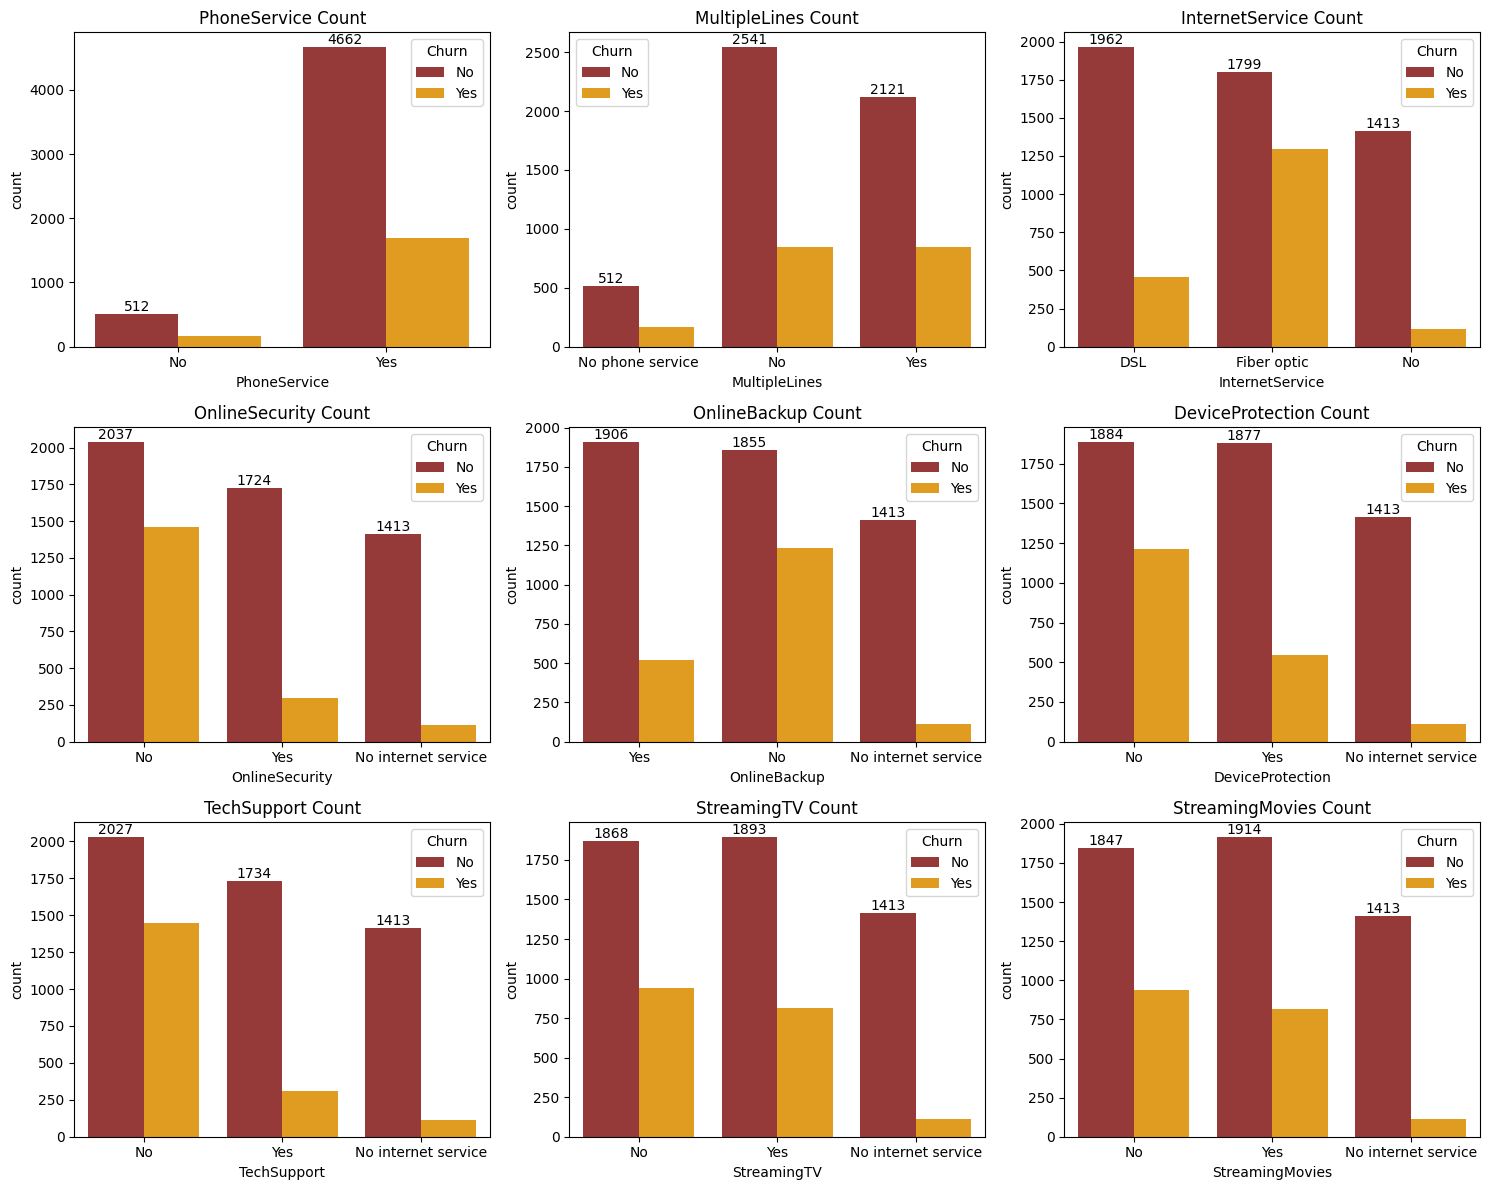

In [21]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15,12))
colors = ["brown", "orange"]

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns layout
    ax = sns.countplot(x=col, data=data, hue="Churn", palette=colors)
    ax.bar_label(ax.containers[0])  # show count labels
    plt.title(f"{col} Count")
    plt.tight_layout()

plt.show()

**Most customers who churn tend to have core phone and internet services, but many lack added protections like OnlineSecurity, TechSupport, and DeviceProtection. Churn is noticeably higher for users with streaming services and no additional support options. Customers with “No internet service” have very low churn since they often use fewer services. Overall, absence of value-add services appears strongly linked to higher churn.**

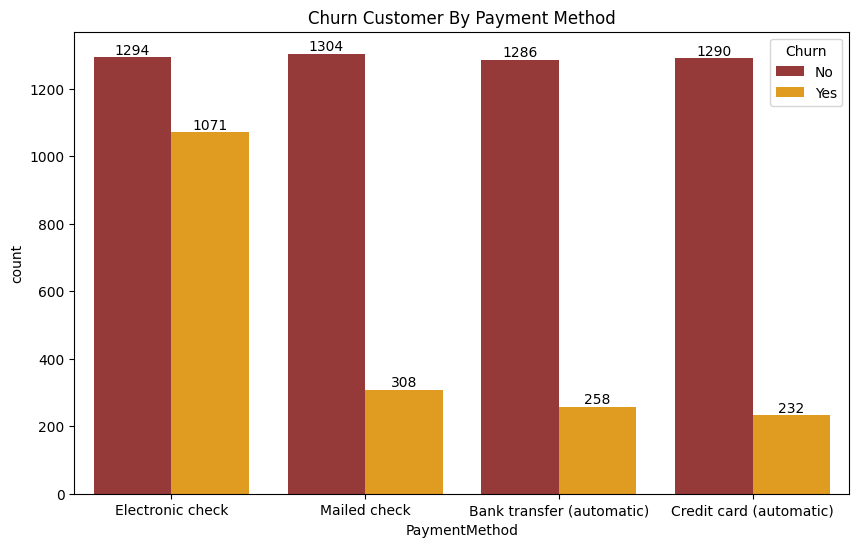

In [22]:
colors = ["brown","orange"]
plt.figure(figsize=(10,6))
xx = sns.countplot(x = "PaymentMethod", data = data, hue="Churn", palette=colors)
xx.bar_label(xx.containers[0])
xx.bar_label(xx.containers[1])
plt.title("Churn Customer By Payment Method")
plt.show()

**Customer is likely to Churn when he is using electronic check as a payment method.**

# **---------------------------------------------------------------------------------------------------------------------------------------------**


## Target Variable Encode

In [23]:
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})

In [24]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Missing Values Handle

In [25]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\sawma\AppData\Local\Temp\ipykernel_5288\830575513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


## Categorical Encoding

In [26]:
data.drop('customerID', axis=1, inplace=True)

In [27]:
cat_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [28]:
data_encoded = data_encoded.astype(int)
data_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29,29,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56,1889,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53,108,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42,1840,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70,151,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Choose

### LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8218594748048261
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

[[934 102]
 [149 224]]


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7877927608232789
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

[[938  98]
 [201 172]]


### Model Improvement 

In [39]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [42]:
print("Before Oversampling:\n", y_train.value_counts())
print("\nAfter Oversampling:\n", y_train_res.value_counts())

Before Oversampling:
 Churn
0    4138
1    1496
Name: count, dtype: int64

After Oversampling:
 Churn
0    4138
1    4138
Name: count, dtype: int64


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest on balanced data
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_rf_sm = rf_sm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf_sm))
print(classification_report(y_test, y_pred_rf_sm))
print(confusion_matrix(y_test, y_pred_rf_sm))


Accuracy: 0.772888573456352
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1036
           1       0.57      0.59      0.58       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.77      0.77      1409

[[869 167]
 [153 220]]


**After applying SMOTE, the model’s overall accuracy slightly decreased, but it became much better at detecting churn customers. The Precision-Recall curve shows improved recall, meaning the model now identifies more actual churners. This trade-off is valuable for business since catching potential churners is more important than maximizing accuracy.**

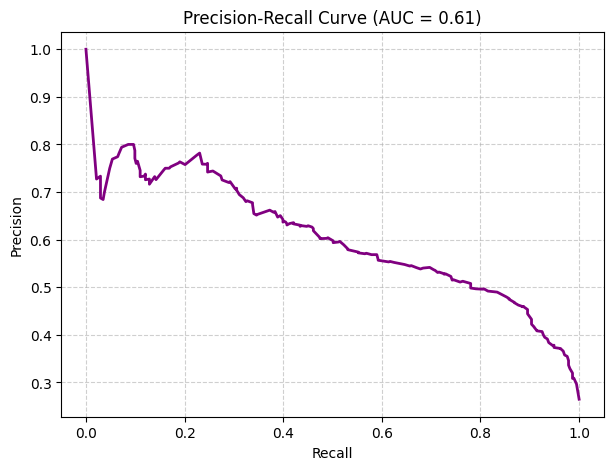

In [44]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for churn = 1
y_prob = rf_sm.predict_proba(X_test)[:, 1]

# Calculate precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='purple', linewidth=2)
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Feature importance

C:\Users\sawma\AppData\Local\Temp\ipykernel_5288\1086055154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


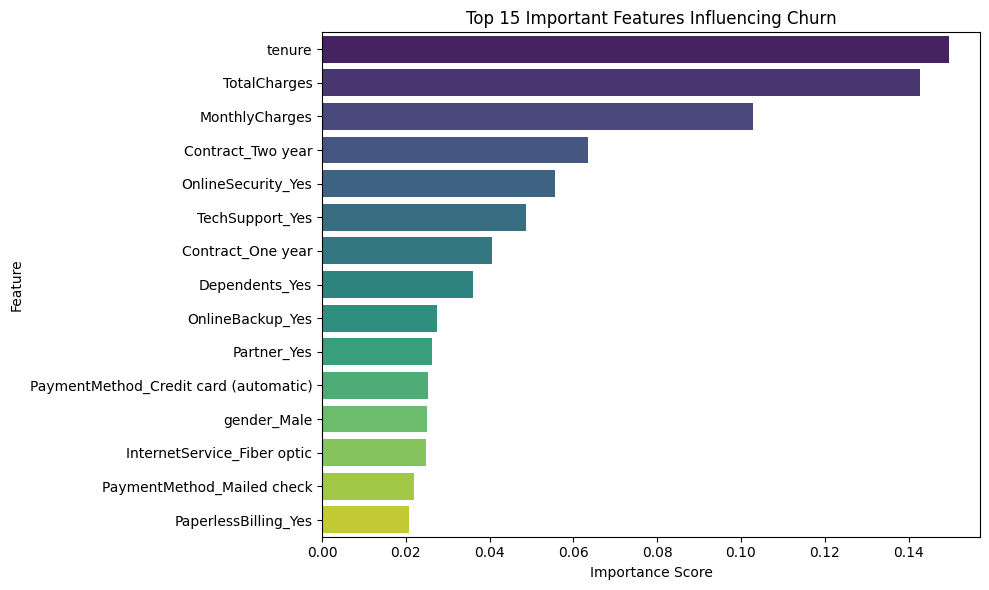

In [45]:
feature_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': rf_sm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 15 features plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title("Top 15 Important Features Influencing Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Hyperparameter Tuning (GridSearchCV)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Parameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
# Model
rf_tuned = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=3,
    scoring='recall',  # focus on catching churners
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluate the Tuned Model

In [49]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1036
           1       0.57      0.74      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.75      1409
weighted avg       0.81      0.78      0.79      1409

[[828 208]
 [ 96 277]]


**After tuning, the Random Forest model identifies churn customers much more effectively, achieving a strong recall of 0.74 while keeping overall accuracy around 78%. This makes it far more useful for real-world churn prediction.**

### Feature Importance Visualization

C:\Users\sawma\AppData\Local\Temp\ipykernel_5288\2439466733.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


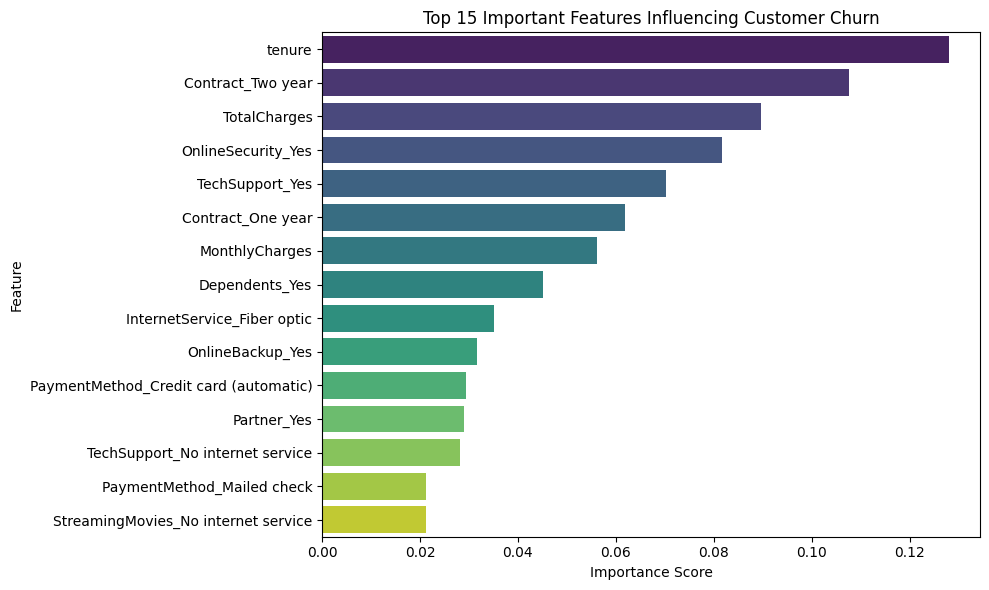

In [50]:
# Feature importance nikalna
feature_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 15 features plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title("Top 15 Important Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Save & Deploy the Final Model

In [51]:
import joblib
joblib.dump(best_rf, 'final_churn_model.pkl')

print("✅ Model saved successfully as final_churn_model.pkl")

✅ Model saved successfully as final_churn_model.pkl
